GOAL OF THE PROJECT:
   
   The goal is to study the Restaurant dataset clean it, create new features, and use charts and statistics to understand characteristics of Data.

OBJECTIVES:
-

1.Understand the Rastaurant dataset

2.Clean and preprocess the dataset

3.Discover trends and outliers

4.statistics Test

5.Perform univariate, bivariate, and multivariate analysis

# Data understanding

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sos
import statistics
from scipy.stats import chi2_contingency
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

In [3]:
df=pd.read_csv('Restaurant_Inspection_Results.csv')

In [4]:
res1=df.copy()

Restaurant Inspection Dataset
Total Rows 290022 and 27 Columns

In [5]:
df.columns

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE', 'Latitude', 'Longitude',
       'Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL',
       'NTA', 'Location Point1'],
      dtype='object')

First 5 using head function

In [6]:
dataframe=pd.DataFrame(df)
dataframe.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1
0,50114537,MAMA'S CUPBOARD,Manhattan,42,WEST 42 STREET,10036.0,6469191465,NaN,1/1/1900,NaN,...,NaN,40.754068,-73.982321,105.0,4.0,8400.0,1085593.0,1.012570e+09,MN17,NaN
1,50164148,TIENDA CHICOJ,Queens,10840,ROOSEVELT AVE,11368.0,7189166374,NaN,1/1/1900,NaN,...,NaN,40.750845,-73.858280,404.0,21.0,40100.0,4307718.0,4.019960e+09,QN26,NaN
2,50169870,TEX'S CHICKEN & BURGERS,Queens,21712,MERRICK BLVD,11413.0,9178850048,NaN,1/1/1900,NaN,...,NaN,40.679915,-73.752087,413.0,31.0,35800.0,4279942.0,4.130110e+09,QN66,NaN
3,50132087,FANTASTIC BEASTS,Queens,36-10,UNION STREET,11354.0,2538807717,NaN,1/1/1900,NaN,...,NaN,40.763482,-73.828056,407.0,20.0,86900.0,4112354.0,4.049770e+09,QN22,NaN
4,50172040,BROAD STREET DELI,Manhattan,270,PARK AVENUE,10017.0,7043286780,NaN,1/1/1900,NaN,...,NaN,40.755634,-73.975109,105.0,4.0,9400.0,1035421.0,1.012830e+09,MN17,NaN


last 5 using head function

In [7]:
dataframe.tail()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1
290017,50121962,BURGER KING,Brooklyn,9006,CHURCH AVENUE,11236.0,7184985574,Hamburgers,6/17/2022,Violations were cited in the following area(s).,...,Pre-permit (Operational) / Initial Inspection,40.652872,-73.919806,317.0,42.0,88800.0,3103358.0,3.047110e+09,BK96,NaN
290018,50150281,MADMAN ESPRESSO,Manhattan,721,BROADWAY,10003.0,3477811121,Coffee/Tea,2/10/2025,Violations were cited in the following area(s).,...,Pre-permit (Operational) / Initial Inspection,40.729306,-73.993502,102.0,2.0,5700.0,1088447.0,1.005470e+09,MN23,NaN
290019,40949905,KA WAH BAKERY,Manhattan,9,ELDRIDGE STREET,10002.0,2122260133,Chinese,7/13/2022,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.714660,-73.993770,103.0,1.0,1600.0,1003772.0,1.002920e+09,MN27,NaN
290020,50121766,CROSSBAR / SOCCER POST UPPER WESTSIDE,Manhattan,250,WEST 86 STREET,10024.0,2126522238,American,11/14/2022,Violations were cited in the following area(s).,...,Administrative Miscellaneous / Initial Inspection,40.788484,-73.976942,107.0,6.0,17100.0,1081052.0,1.012330e+09,MN12,NaN
290021,41703865,SAFFRON,Queens,4404,BROADWAY,11103.0,7182556310,Indian,8/16/2022,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.757393,-73.915669,401.0,26.0,15900.0,4012369.0,4.007070e+09,QN70,NaN


Describe function for describe about the value

In [54]:
drop_col_new=df.drop(['S.No','building','street','zipcode','phone','action','violation_code','violation_description','cuisine_description','latitude','longitude','community_board','council_district','census_tract','bin','bbl','nta','location_point1'], axis=1,errors='ignore')
drop_col_new.describe()

,score
count,274080.000000
mean,24.825354
std,18.609477
min,0.000000
25%,12.000000
50%,21.000000
75%,33.000000
max,175.000000


Info function for information of data set datatype

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290022 entries, 0 to 290021
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  290022 non-null  int64  
 1   DBA                    290015 non-null  object 
 2   BORO                   290022 non-null  object 
 3   BUILDING               289516 non-null  object 
 4   STREET                 290021 non-null  object 
 5   ZIPCODE                287205 non-null  float64
 6   PHONE                  290016 non-null  object 
 7   CUISINE DESCRIPTION    286337 non-null  object 
 8   INSPECTION DATE        290022 non-null  object 
 9   ACTION                 286337 non-null  object 
 10  VIOLATION CODE         284189 non-null  object 
 11  VIOLATION DESCRIPTION  284189 non-null  object 
 12  CRITICAL FLAG          290022 non-null  object 
 13  SCORE                  274080 non-null  float64
 14  GRADE                  141303 non-nu

# Data Cleaning

In [10]:
print('Row',df.shape[0])
print('column',df.shape[1])

Row 290022
column 27


Finding Null values for Columns

In [11]:
df.isnull().sum()

CAMIS                         0
DBA                           7
BORO                          0
BUILDING                    506
STREET                        1
ZIPCODE                    2817
PHONE                         6
CUISINE DESCRIPTION        3685
INSPECTION DATE               0
ACTION                     3685
VIOLATION CODE             5833
VIOLATION DESCRIPTION      5833
CRITICAL FLAG                 0
SCORE                     15942
GRADE                    148719
GRADE DATE               156829
RECORD DATE                   0
INSPECTION TYPE            3685
Latitude                    411
Longitude                   411
Community Board            3621
Council District           3620
Census Tract               3620
BIN                        5014
BBL                         805
NTA                        3621
Location Point1          290022
dtype: int64

Finding Null values for total dataset

In [12]:
df.isnull().sum().sum()

np.int64(658693)

Change a column names

In [13]:
df.columns = df.columns.str.replace(" ", "_").str.lower()
df.rename(columns={'camis':'S.No'},inplace=True)
df.rename(columns={'dba':'Restaurant_Name'},inplace=True)
df.rename(columns={'boro':'Restaurant_location'},inplace=True)
df.columns

Index(['S.No', 'Restaurant_Name', 'Restaurant_location', 'building', 'street',
       'zipcode', 'phone', 'cuisine_description', 'inspection_date', 'action',
       'violation_code', 'violation_description', 'critical_flag', 'score',
       'grade', 'grade_date', 'record_date', 'inspection_type', 'latitude',
       'longitude', 'community_board', 'council_district', 'census_tract',
       'bin', 'bbl', 'nta', 'location_point1'],
      dtype='object')

In [14]:
df.ndim

2

In [15]:
df.nunique()

S.No                     30538
Restaurant_Name          24283
Restaurant_location          6
building                  7657
street                    2457
zipcode                    237
phone                    27094
cuisine_description         89
inspection_date           1798
action                       5
violation_code             149
violation_description      226
critical_flag                3
score                      142
grade                        6
grade_date                1579
record_date                  1
inspection_type             33
latitude                 24407
longitude                24424
community_board             68
council_district            51
census_tract              1184
bin                      21154
bbl                      20793
nta                        193
location_point1              0
dtype: int64

In [16]:
df['score'].value_counts()

score
12.0     23805
13.0     23265
10.0     11163
11.0     10338
9.0       9234
         ...  
141.0        9
144.0        9
122.0        8
153.0        7
140.0        5
Name: count, Length: 142, dtype: int64

Finding a total duplicat

In [17]:
df.duplicated().sum()

np.int64(6)

Drop Duplicate

In [18]:
df.drop_duplicates()
df

,S.No,Restaurant_Name,Restaurant_location,building,street,zipcode,phone,cuisine_description,inspection_date,action,...,inspection_type,latitude,longitude,community_board,council_district,census_tract,bin,bbl,nta,location_point1
0,50114537,MAMA'S CUPBOARD,Manhattan,42,WEST 42 STREET,10036.0,6469191465,NaN,1/1/1900,NaN,...,NaN,40.754068,-73.982321,105.0,4.0,8400.0,1085593.0,1.012570e+09,MN17,NaN
1,50164148,TIENDA CHICOJ,Queens,10840,ROOSEVELT AVE,11368.0,7189166374,NaN,1/1/1900,NaN,...,NaN,40.750845,-73.858280,404.0,21.0,40100.0,4307718.0,4.019960e+09,QN26,NaN
2,50169870,TEX'S CHICKEN & BURGERS,Queens,21712,MERRICK BLVD,11413.0,9178850048,NaN,1/1/1900,NaN,...,NaN,40.679915,-73.752087,413.0,31.0,35800.0,4279942.0,4.130110e+09,QN66,NaN
3,50132087,FANTASTIC BEASTS,Queens,36-10,UNION STREET,11354.0,2538807717,NaN,1/1/1900,NaN,...,NaN,40.763482,-73.828056,407.0,20.0,86900.0,4112354.0,4.049770e+09,QN22,NaN
4,50172040,BROAD STREET DELI,Manhattan,270,PARK AVENUE,10017.0,7043286780,NaN,1/1/1900,NaN,...,NaN,40.755634,-73.975109,105.0,4.0,9400.0,1035421.0,1.012830e+09,MN17,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290017,50121962,BURGER KING,Brooklyn,9006,CHURCH AVENUE,11236.0,7184985574,Hamburgers,6/17/2022,Violations were cited in the following area(s).,...,Pre-permit (Operational) / Initial Inspection,40.652872,-73.919806,317.0,42.0,88800.0,3103358.0,3.047110e+09,BK96,NaN
290018,50150281,MADMAN ESPRESSO,Manhattan,721,BROADWAY,10003.0,3477811121,Coffee/Tea,2/10/2025,Violations were cited in the following area(s).,...,Pre-permit (Operational) / Initial Inspection,40.729306,-73.993502,102.0,2.0,5700.0,1088447.0,1.005470e+09,MN23,NaN
290019,40949905,KA WAH BAKERY,Manhattan,9,ELDRIDGE STREET,10002.0,2122260133,Chinese,7/13/2022,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.714660,-73.993770,103.0,1.0,1600.0,1003772.0,1.002920e+09,MN27,NaN
290020,50121766,CROSSBAR / SOCCER POST UPPER WESTSIDE,Manhattan,250,WEST 86 STREET,10024.0,2126522238,American,11/14/2022,Violations were cited in the following area(s).,...,Administrative Miscellaneous / Initial Inspection,40.788484,-73.976942,107.0,6.0,17100.0,1081052.0,1.012330e+09,MN12,NaN


Drop unwanted columns

In [19]:
df1=df.drop(['building','street','zipcode','phone','action','violation_code','violation_description','cuisine_description','latitude','longitude','community_board','council_district','census_tract','bin','bbl','nta','location_point1'], axis=1,errors='ignore')
df1.columns

Index(['S.No', 'Restaurant_Name', 'Restaurant_location', 'inspection_date',
       'critical_flag', 'score', 'grade', 'grade_date', 'record_date',
       'inspection_type'],
      dtype='object')

Changeing a datatype

In [20]:
df1.inspection_date=pd.to_datetime(df1.inspection_date)
df1.grade_date=pd.to_datetime(df1.grade_date)
df1.record_date=pd.to_datetime(df1.record_date)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290022 entries, 0 to 290021
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   S.No                 290022 non-null  int64         
 1   Restaurant_Name      290015 non-null  object        
 2   Restaurant_location  290022 non-null  object        
 3   inspection_date      290022 non-null  datetime64[ns]
 4   critical_flag        290022 non-null  object        
 5   score                274080 non-null  float64       
 6   grade                141303 non-null  object        
 7   grade_date           133193 non-null  datetime64[ns]
 8   record_date          290022 non-null  datetime64[ns]
 9   inspection_type      286337 non-null  object        
dtypes: datetime64[ns](3), float64(1), int64(1), object(5)
memory usage: 22.1+ MB


Filling null value

In [21]:
df1.loc[df1.Restaurant_Name.isnull(), 'Restaurant_Name']='Unavaibale'
df1.loc[df1.inspection_type.isnull(), 'inspection_type']='Unavaibale'
df1 = df1[df1['score'].notna() & (df1['score'] != 0)]
df1 = df1[df1['grade'].notna() & (df1['grade'] != 0)]

In [22]:
df1_pz = df1[~df1['grade'].isin(['P', 'Z'])]

In [ ]:
re_lo = df1_new[df1_new['Restaurant_location'] != "0"]

Replace a null value with meadian

In [26]:
median_score = df1_pz['score'].median()
df1_new = df1_pz.copy()
df1_new['score'] = df1_new['score'].fillna(median_score)

Show without 0 in score 

In [28]:
df1_new = df1_new[df1_new['score'] != 0]

In [29]:
df1_new = df1_new[df1_new['score'].notna() & (df1_new['score'] != 0)]

Split a grade by scores

In [57]:
df1_new['grade_date'] = pd.to_datetime(df1_new['grade_date'], errors='coerce')

df1_new.loc[df1_new.grade_date.isnull(), 'grade_date'] = pd.Timestamp('2000-01-01')

df1_new.loc[df1_new.inspection_type.isnull(), 'inspection_type'] = 'Unavailable'
df1_new.loc[(df1_new.grade.isnull()) & (df1_new.score >= 1) & (df1_new.score <= 45), 'grade'] = 'A'
df1_new.loc[(df1_new.grade.isnull()) & (df1_new.score >= 46) & (df1_new.score <= 70), 'grade'] = 'B'
df1_new.loc[(df1_new.grade.isnull()) & (df1_new.score >= 71) & (df1_new.score <= 100), 'grade'] = 'C'
df1_new.loc[(df1_new.grade.isnull()) & (df1_new.score == -1), 'grade'] = 'N'

df1_new['grade_date'] = pd.to_datetime(df1_new['grade_date'], errors='coerce')

df1_new.loc[df1_new.grade_date.isnull(), 'grade_date'] = pd.Timestamp('2000-01-01')

df1_new.loc[df1_new.inspection_type.isnull(), 'inspection_type'] = 'Unavailable'


After cleaning a data set Head 10 rows

In [58]:
df1_new.head()

,S.No,Restaurant_Name,Restaurant_location,inspection_date,critical_flag,score,grade,grade_date,record_date,inspection_type,grade_num
18,41459621,GINO'S BRICK OVEN PIZZA & TRATTORIA,Brooklyn,2021-09-03,Critical,13.0,A,2021-09-03,2025-09-11,Cycle Inspection / Initial Inspection,1
33,41020005,UNCLE BILL'S DINER,Queens,2023-04-07,Critical,12.0,A,2023-04-07,2025-09-11,Cycle Inspection / Initial Inspection,1
59,50141902,NEW SKY BAKERYLAND,Brooklyn,2025-02-05,Critical,33.0,C,2025-02-05,2025-09-11,Cycle Inspection / Re-inspection,3
69,50073587,DUKE EATERY,Manhattan,2024-03-21,Critical,13.0,A,2024-03-21,2025-09-11,Cycle Inspection / Re-inspection,1
72,41461802,DIG INN SEASONAL MARKET,Manhattan,2022-04-04,Critical,10.0,A,2022-04-04,2025-09-11,Cycle Inspection / Initial Inspection,1


After cleaning a data set Tail 10 rows

In [32]:
df1_new.tail()

,S.No,Restaurant_Name,Restaurant_location,inspection_date,critical_flag,score,grade,grade_date,record_date,inspection_type
290011,50143569,CAFE JULIET,Staten Island,2024-03-06,Not Critical,13.0,A,2024-03-06,2025-09-11,Pre-permit (Operational) / Initial Inspection
290013,50137991,PLANTSHED,Manhattan,2025-09-03,Not Critical,9.0,A,2025-09-03,2025-09-11,Cycle Inspection / Re-inspection
290015,50101588,BROOKLYN BAGEL & COFFEE COMPANY,Queens,2023-12-04,Not Critical,4.0,A,2023-12-04,2025-09-11,Cycle Inspection / Initial Inspection
290017,50121962,BURGER KING,Brooklyn,2022-06-17,Not Critical,13.0,A,2022-06-17,2025-09-11,Pre-permit (Operational) / Initial Inspection
290018,50150281,MADMAN ESPRESSO,Manhattan,2025-02-10,Critical,46.0,N,2000-01-01,2025-09-11,Pre-permit (Operational) / Initial Inspection


Create a new column called grade_num if A=1,B=2,C=3,D=4

In [33]:
grade_map = {"A": 1,"B": 2,"C": 3,"N": 4}
df1_new['grade_num'] =df1_new['grade'].map(grade_map)

After cleaning a data to find null value

In [34]:
df1_new.isnull().sum()

S.No                   0
Restaurant_Name        0
Restaurant_location    0
inspection_date        0
critical_flag          0
score                  0
grade                  0
grade_date             0
record_date            0
inspection_type        0
grade_num              0
dtype: int64

# Outlier

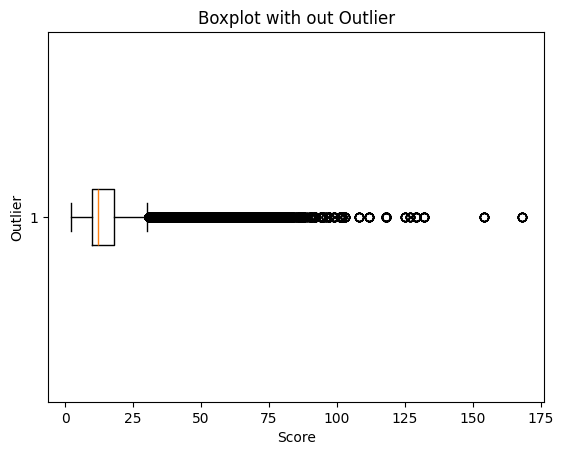

In [35]:
import statistics
out=df1_new['score']
plt.boxplot(out,vert=False)
plt.title("Boxplot with out Outlier")
plt.xlabel('Score')
plt.ylabel('Outlier')
plt.show()

After replace with mean value in Outlier

Mean Value is : 16.076706592731384
IQR is : 8.0
Lower Bond : -2.0
Upper Bond : 22.0




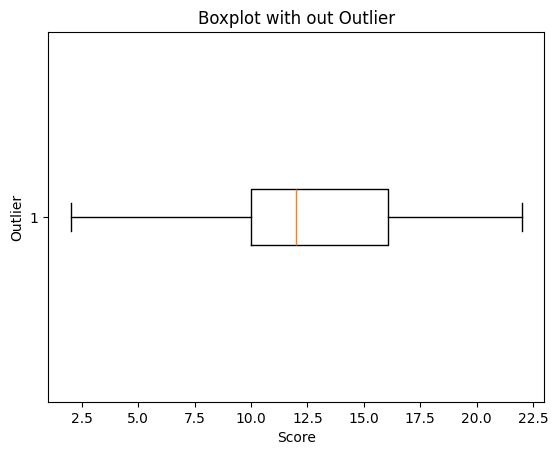

In [36]:
import statistics
out=df1_new['score'].dropna()

mean_val=np.mean(out)
mean_val

q1=np.percentile(out,25)
q3=np.percentile(out,75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q1+1.5*iqr

median_val = statistics.median(out)

print(f"Mean Value is : {mean_val}")
print(f"IQR is : {iqr}")
print(f"Lower Bond : {lower}")
print(f"Upper Bond : {upper}")
print("\n")
out_replaced = np.where((out < lower) | (out > upper), mean_val, out)
plt.boxplot(out_replaced,vert=False)
plt.title("Boxplot with out Outlier")
plt.xlabel('Score')
plt.ylabel('Outlier')
plt.show()

# statistics Test


Chi-square test is use to find relationship between two group

In [ ]:
# Chi-square test of independence

from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df1_new['Restaurant_location'], df1_new['grade'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)

if p < 0.05:
    print("There is a significant relationship between Restaurant_location and grade.")
else:
    print("No significant relationship between Restaurant_location and grade.")

Chi-square Statistic: 676.0455458635186
Degrees of Freedom: 12
P-value: 5.896252577007812e-137
There is a significant relationship between Restaurant_location and grade.


One sample t test is used to test a popuulation mean and sample mean are equal or not

In [ ]:
# One sample T-test

from scipy import stats

score=df1_new['score']
mean_val1=np.mean(score)
print(f'Mean value is {mean_val1.round()}')

np.random.seed(10)
sample_size=10
sample_test=np.random.choice(score,sample_size)
print(sample_test)

_,p_value = stats.ttest_1samp(a=sample_test,popmean=mean_val1)

print(f'p-value is :{p_value}')

if p_value<0.05:
    print("reject the null hypothesis")
else:
    print("Accept the null hypothesis")

Mean value is 16.0
[13. 18. 10.  9. 10. 20. 13. 12. 12. 12.]
p-value is :0.0187267005716692
reject the null hypothesis


The sample mean is very close to the population mean of score.

In [ ]:
# independent t-test    

from scipy.stats import ttest_ind

group1 = df1_new[df1_new['Restaurant_location'] == 'Manhattan']['score'].dropna()
group2 = df1_new[df1_new['Restaurant_location'] == 'Brooklyn']['score'].dropna()

t_stat, p_val = ttest_ind(group1, group2, equal_var=True) 

print("T-statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("The mean inspection scores are significantly different between Manhattan and Brooklyn.")
else:
    print("No significant difference in mean inspection scores between Manhattan and Brooklyn.")

T-statistic: -4.79763458932588
P-value: 1.6082794480324917e-06
The mean inspection scores are significantly different between Manhattan and Brooklyn.


Restaurants have different average inspection scores

In [40]:
locations = df1_new['Restaurant_location'].unique()
print(locations)
df1_new['Restaurant_location'].value_counts()

['Brooklyn' 'Queens' 'Manhattan' 'Bronx' 'Staten Island']


Restaurant_location
Manhattan        49337
Brooklyn         33868
Queens           31561
Bronx            12144
Staten Island     4917
Name: count, dtype: int64

In [ ]:
# Anova Test

from scipy.stats import f_oneway

Brooklyn_scores = df1_new[df1_new['Restaurant_location']=='Brooklyn']['score'].dropna()
Queens_scores = df1_new[df1_new['Restaurant_location']=='Queens']['score'].dropna()
Manhattan_scores = df1_new[df1_new['Restaurant_location']=='Manhattan']['score'].dropna()
Bronx_scores = df1_new[df1_new['Restaurant_location']=='Bronx']['score'].dropna()
Staten_Island_scores = df1_new[df1_new['Restaurant_location']=='Staten Island']['score'].dropna()

f_stat, p_val = f_oneway(Brooklyn_scores, Queens_scores, Manhattan_scores, Bronx_scores, Staten_Island_scores)

print("F-statistic:", f_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Mean inspection scores differ significantly across locations.")
else:
    print("No significant difference in mean inspection scores across locations.")

F-statistic: 112.60108871918268
P-value: 5.19596213493181e-96
Mean inspection scores differ significantly across locations.


At least one restaurant location has different average inspection scores from the others.

# Univariate


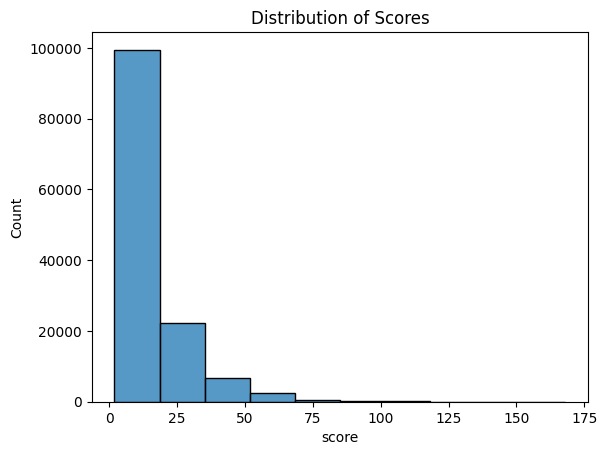

In [42]:
sos.histplot(df1_new['score'], bins=10)
plt.title("Distribution of Scores")
plt.show()

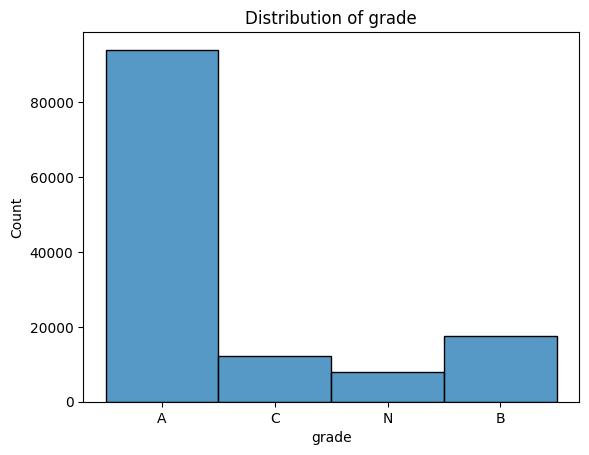

In [43]:
sos.histplot(df1_new['grade'])
plt.title("Distribution of grade")
plt.show()

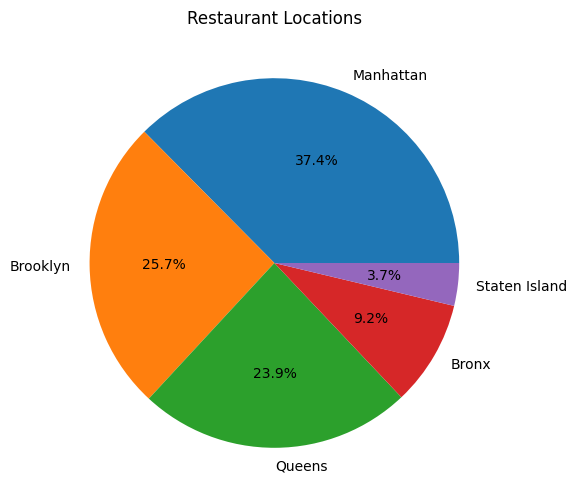

In [44]:
location_counts = df1_new['Restaurant_location'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(location_counts,autopct='%1.1f%%',labels=location_counts.index)
plt.title("Restaurant Locations")
plt.show()

# Bivariate

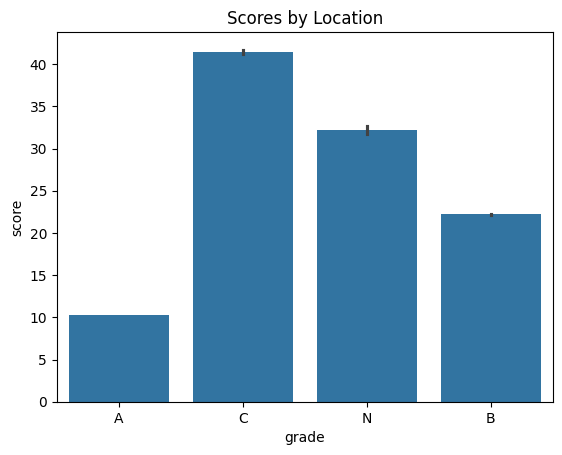

In [45]:
sos.barplot(x='grade', y='score', data=df1_new)
plt.title("Scores by Location")
plt.show()

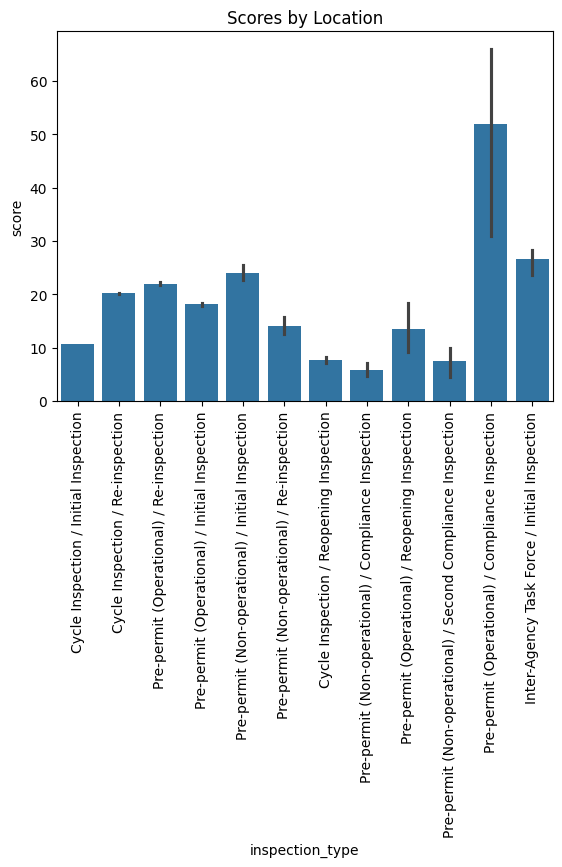

In [63]:
sos.barplot(x='inspection_type', y='score', data=df1_new)
plt.title("Scores by Location")
plt.xticks(rotation=90)
plt.show()

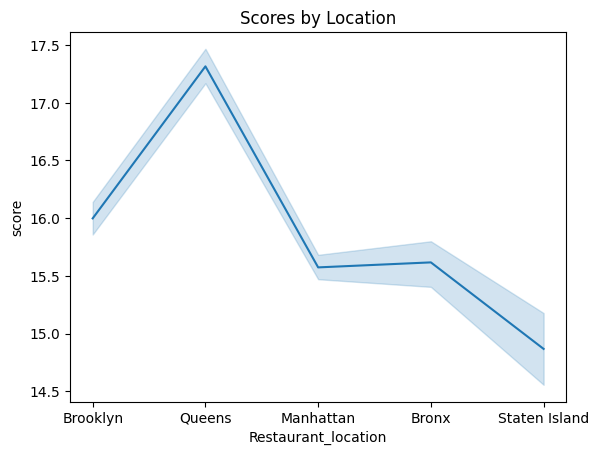

In [46]:
sos.lineplot(x='Restaurant_location', y='score', data=df1_new)
plt.title("Scores by Location")
plt.show()

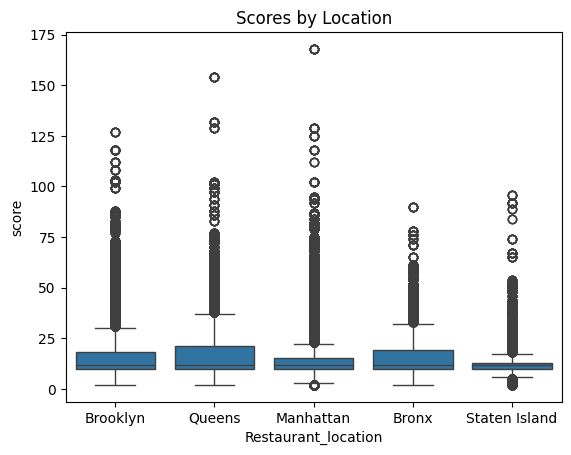

In [48]:
sos.boxplot(x='Restaurant_location', y='score', data=df1_new)
plt.title("Scores by Location")
plt.show()

# Multivariate

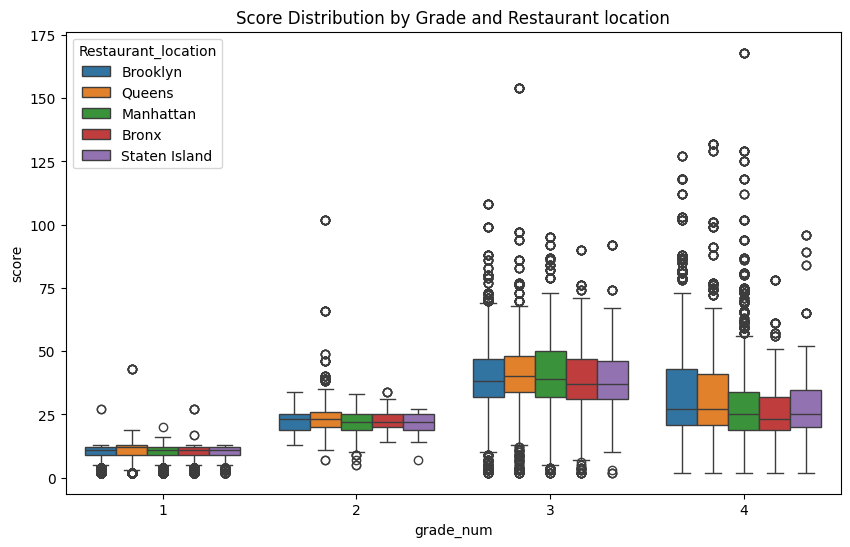

In [51]:
plt.figure(figsize=(10,6))
sos.boxplot(x="grade_num", y="score", hue="Restaurant_location", data=df1_new)
plt.title("Score Distribution by Grade and Restaurant location")
plt.show()


Grade Distribution: Most restaurants received an A grade, with fewer B and C grades, indicating overall good compliance.

Many restaurants improved their grades after re-inspection, highlighting the effectiveness of the grading program.